# Short Time Fourier Transform (STFT), Wigner Distribution, and Pseudo Wigner Distribution 

In [2]:
using Winston;
using Color;
import DSP
using PyPlot

In [3]:
# include all modules in juwvid
include("../juwvid.jl")

juwvid

## Single Component Linear Signal

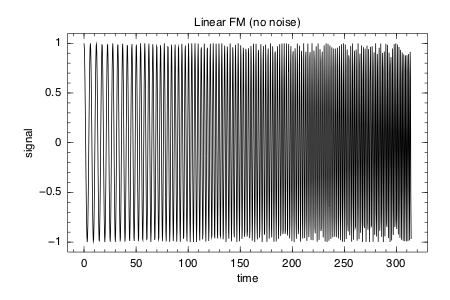

In [4]:
# Figure 1
nsample=1024
x,y,iw,ynorm=sampledata.genlinfm(nsample,1.0,0.01);
p = FramedPlot(title="Linear FM (no noise)",xlabel="time",ylabel="signal");
add(p, Curve(x,y))

## Short Time Fourier Transform

In [5]:
tfrst=stft.tfrstft(y);

Use fft.


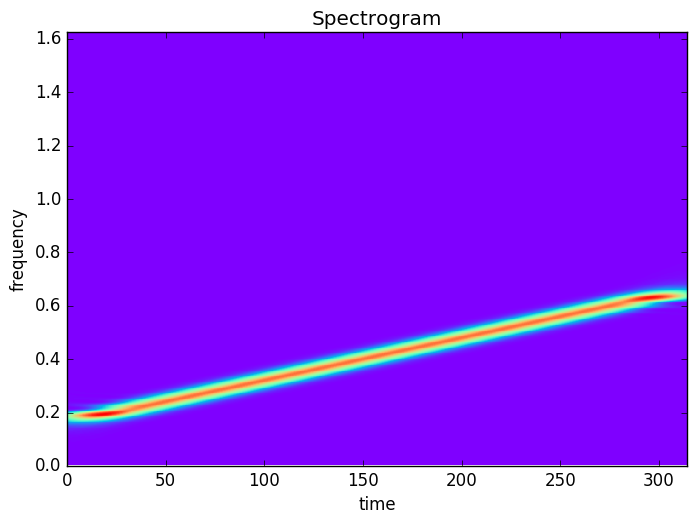

PyObject <matplotlib.text.Text object at 0x32ac54890>

In [9]:
# Figure 2
a=juwplot.wtfrshow(abs(tfrst).^2,x[2]-x[1],x[1],x[end],NaN,NaN,0.7,"rainbow")
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.title("Spectrogram")

### Changing the window size

In [7]:
tfrst4=stft.tfrstft(y,NaN,NaN,NaN,NaN,4);
tfrst8=stft.tfrstft(y,NaN,NaN,NaN,NaN,8);
tfrst16=stft.tfrstft(y,NaN,NaN,NaN,NaN,16);
tfrst32=stft.tfrstft(y,NaN,NaN,NaN,NaN,32);

Use fft.
Use fft.
Use fft.
Use fft.


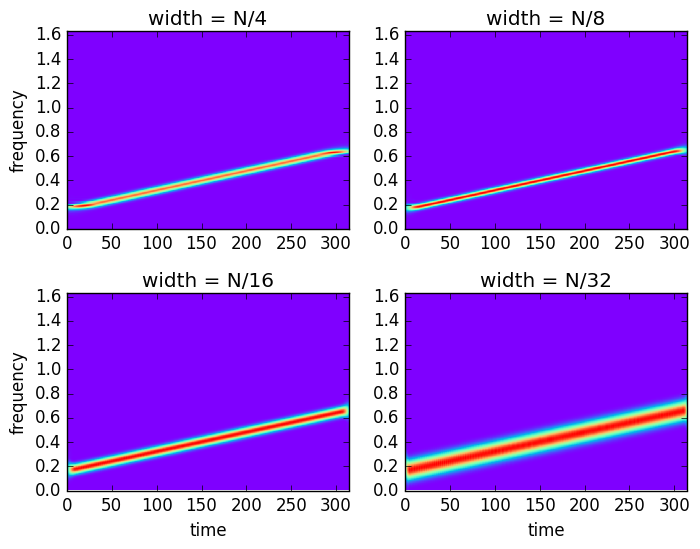

PyObject <matplotlib.text.Text object at 0x32a195fd0>

In [8]:
# Figure 3
fig=PyPlot.figure()
ax = fig[:add_subplot](2,2,1)
a=juwplot.wtfrshow(abs(tfrst4).^2,x[2]-x[1],x[1],x[end],NaN,NaN,0.7,"rainbow")
PyPlot.ylabel("frequency")
PyPlot.title("width = N/4")
ax = fig[:add_subplot](2,2,2)
a=juwplot.wtfrshow(abs(tfrst8).^2,x[2]-x[1],x[1],x[end],NaN,NaN,0.7,"rainbow")
PyPlot.title("width = N/8")
ax = fig[:add_subplot](2,2,3)
a=juwplot.wtfrshow(abs(tfrst16).^2,x[2]-x[1],x[1],x[end],NaN,NaN,0.7,"rainbow")
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.title("width = N/16")
ax = fig[:add_subplot](2,2,4)
a=juwplot.wtfrshow(abs(tfrst32).^2,x[2]-x[1],x[1],x[end],NaN,NaN,0.7,"rainbow")
PyPlot.xlabel("time")
PyPlot.title("width = N/32")

## Comparison with the (pseudo) Winger Ville distribution

In [10]:
### generating the analytic signal of y and computing the WV and the pseudo WV
zs=DSP.Util.hilbert(y); 
tfrs=cohenclass.tfrwv(zs);
tfrps=cohenclass.tfrpwv(zs);

Single Wigner Ville
Use fft.
Single pseudo Wigner Ville
Use fft.


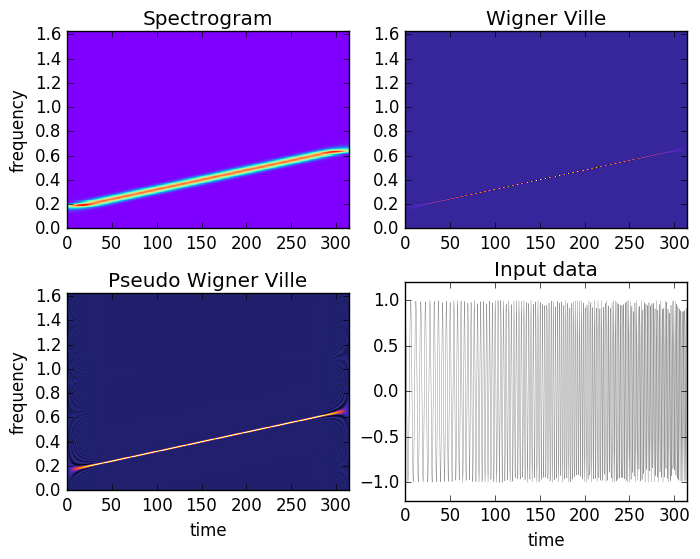

PyObject <matplotlib.text.Text object at 0x335a44290>

In [12]:
# Figure 4
fig=PyPlot.figure()
ax = fig[:add_subplot](2,2,1)
a=juwplot.wtfrshow(abs(tfrst).^2,x[2]-x[1],x[1],x[end],NaN,NaN,0.7,"rainbow")
PyPlot.ylabel("frequency")
PyPlot.title("Spectrogram")
ax = fig[:add_subplot](2,2,2)
a=juwplot.tfrshow(real(tfrs),x[2]-x[1],x[1],x[end])
PyPlot.title("Wigner Ville")
ax = fig[:add_subplot](2,2,3)
a=juwplot.tfrshow(real(tfrps),x[2]-x[1],x[1],x[end])
PyPlot.ylabel("frequency")
PyPlot.xlabel("time")
PyPlot.title("Pseudo Wigner Ville")
ax = fig[:add_subplot](2,2,4)
PyPlot.plot(x,y,color="gray",lw=0.3)
PyPlot.xlim(0,x[end])
PyPlot.ylim(-1.2,1.2)
PyPlot.xlabel("time")
PyPlot.title("Input data")

## with noise

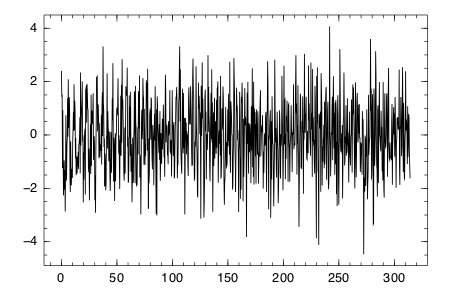

In [14]:
# Figure 5
using Distributions
d = Normal()
ynoise=y+rand(d,nsample)*std(y)*1.5
Winston.plot(x,ynoise)

In [15]:
tfrst=stft.tfrstft(ynoise);
zs=DSP.Util.hilbert(ynoise); 
tfrs=cohenclass.tfrwv(zs);
tfrps=cohenclass.tfrpwv(zs);

Use fft.
Single Wigner Ville
Use fft.
Single pseudo Wigner Ville
Use fft.


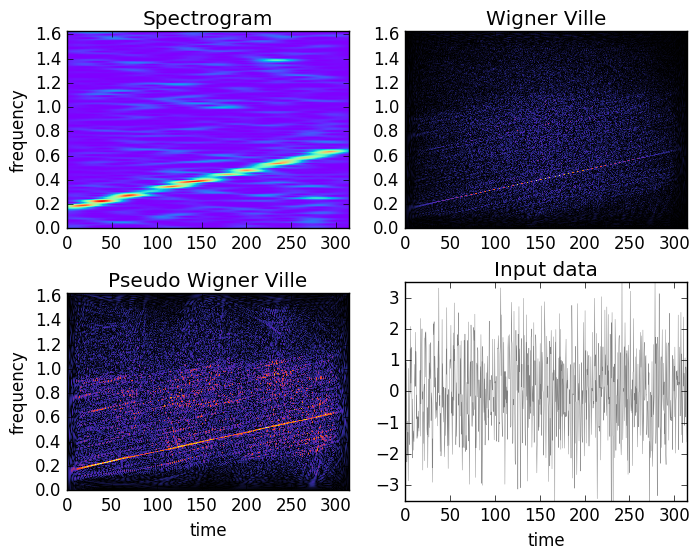

PyObject <matplotlib.text.Text object at 0x33bf2ff10>

In [16]:
# Figure 6
fig=PyPlot.figure()
ax = fig[:add_subplot](2,2,1)
a=juwplot.wtfrshow(abs(tfrst).^2,x[2]-x[1],x[1],x[end],NaN,NaN,0.7,"rainbow")
PyPlot.ylabel("frequency")
PyPlot.title("Spectrogram")
ax = fig[:add_subplot](2,2,2)
a=juwplot.tfrshow(abs(tfrs),x[2]-x[1],x[1],x[end])
PyPlot.title("Wigner Ville")
ax = fig[:add_subplot](2,2,3)
a=juwplot.tfrshow(abs(tfrps),x[2]-x[1],x[1],x[end])
PyPlot.ylabel("frequency")
PyPlot.xlabel("time")
PyPlot.title("Pseudo Wigner Ville")
ax = fig[:add_subplot](2,2,4)
PyPlot.plot(x,ynoise,color="gray",lw=0.3)
PyPlot.xlim(0,x[end])
PyPlot.ylim(-3.5,3.5)
PyPlot.xlabel("time")
PyPlot.title("Input data")


## Single component nonlinear signal 

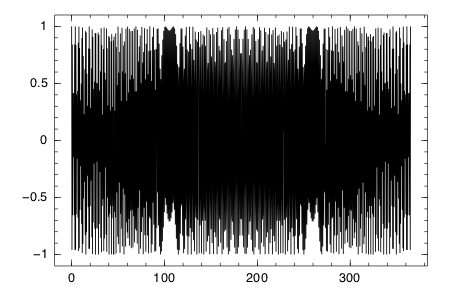

In [17]:
# Figure 7
xs,ys,iws,ynorms=sampledata.genfm(nsample,2*pi,2*pi/365.0,100.0,365.0);
Winston.plot(xs,ys)

In [18]:
tfrst=stft.tfrstft(ys);
zs=DSP.Util.hilbert(ys); 
tfrs=cohenclass.tfrwv(zs);
tfrps=cohenclass.tfrpwv(zs);

Use fft.
Single Wigner Ville
Use fft.
Single pseudo Wigner Ville
Use fft.


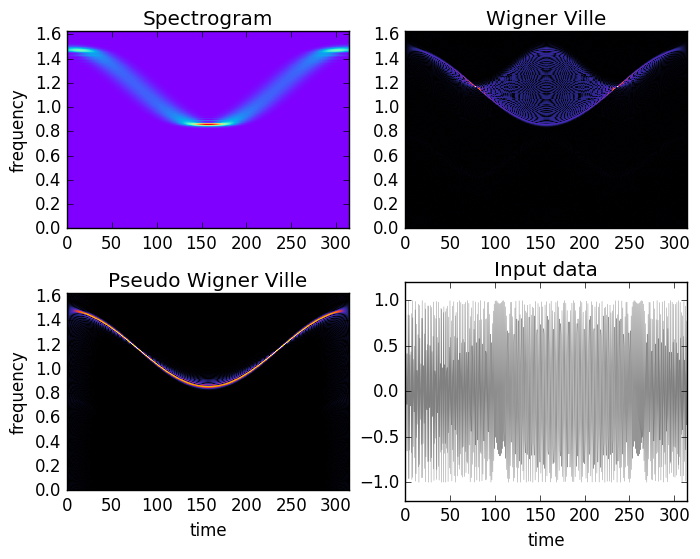

PyObject <matplotlib.text.Text object at 0x33b323a90>

In [19]:
# Figure 8
fig=PyPlot.figure()
ax = fig[:add_subplot](2,2,1)
a=juwplot.wtfrshow(abs(tfrst).^2,x[2]-x[1],x[1],x[end],NaN,NaN,0.7,"rainbow")
PyPlot.ylabel("frequency")
PyPlot.title("Spectrogram")
ax = fig[:add_subplot](2,2,2)
a=juwplot.tfrshow(abs(tfrs),x[2]-x[1],x[1],x[end])
PyPlot.title("Wigner Ville")
ax = fig[:add_subplot](2,2,3)
a=juwplot.tfrshow(abs(tfrps),x[2]-x[1],x[1],x[end])
PyPlot.ylabel("frequency")
PyPlot.xlabel("time")
PyPlot.title("Pseudo Wigner Ville")
ax = fig[:add_subplot](2,2,4)
PyPlot.plot(xs,ys,color="gray",lw=0.3)
PyPlot.xlim(0,x[end])
PyPlot.ylim(-1.2,1.2)
PyPlot.xlabel("time")
PyPlot.title("Input data")

## multicomponent nonlinear signal

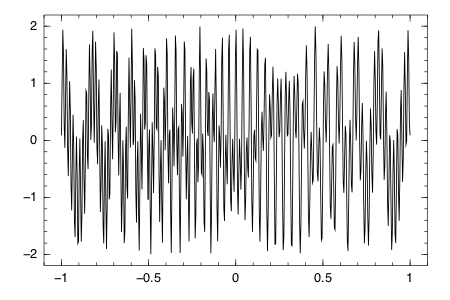

In [20]:
# Figure 9
nsample=512
t,ym=sampledata.genmultifm623(nsample);
Winston.plot(t,ym)

In [21]:
tfrst=stft.tfrstft(ym);

Use fft.


In [22]:
### generating the analytic signal of y
zm=DSP.Util.hilbert(ym); 
tfrs=cohenclass.tfrwv(zm);
tfrps=cohenclass.tfrpwv(zm);

Single Wigner Ville
Use fft.
Single pseudo Wigner Ville
Use fft.


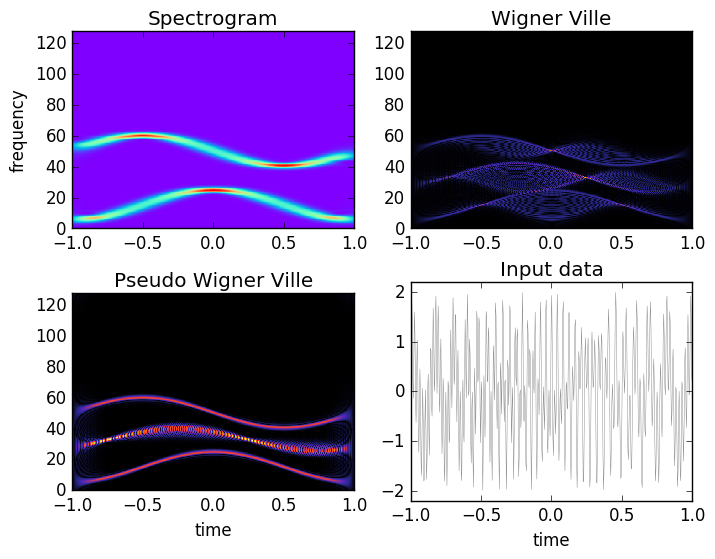

PyObject <matplotlib.text.Text object at 0x32f42ecd0>

In [23]:
# Figure 10
fig=PyPlot.figure()
ax = fig[:add_subplot](2,2,1)
a=juwplot.wtfrshow(abs(tfrst).^2,t[2]-t[1],t[1],t[end],NaN,NaN,0.7,"rainbow")
PyPlot.ylabel("frequency")
PyPlot.title("Spectrogram")
ax = fig[:add_subplot](2,2,2)
a=juwplot.tfrshow(abs(tfrs),t[2]-t[1],t[1],t[end])
PyPlot.title("Wigner Ville")
ax = fig[:add_subplot](2,2,3)
a=juwplot.tfrshow(abs(tfrps),t[2]-t[1],t[1],t[end])
PyPlot.xlabel("time")
PyPlot.title("Pseudo Wigner Ville")
ax = fig[:add_subplot](2,2,4)
PyPlot.plot(t,ym,color="gray",lw=0.3)
PyPlot.xlim(t[1],t[end])
PyPlot.ylim(-2.2,2.2)
PyPlot.xlabel("time")
PyPlot.title("Input data")
